In [ ]:
import pandas as pd


In [ ]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')


In [ ]:
print("Train shape:", train.shape)  # Expect (2000, 65)
print("Test shape: ", test.shape)   # Expect (500, 56)


Train shape: (2000, 65)
Test shape:  (500, 56)


In [ ]:
print(train.head())


   Component1_fraction  Component2_fraction  Component3_fraction  \
0                 0.21                 0.00                 0.42   
1                 0.02                 0.33                 0.19   
2                 0.08                 0.08                 0.18   
3                 0.25                 0.42                 0.00   
4                 0.26                 0.16                 0.08   

   Component4_fraction  Component5_fraction  Component1_Property1  \
0                 0.25                 0.12             -0.021782   
1                 0.46                 0.00             -0.224339   
2                 0.50                 0.16              0.457763   
3                 0.07                 0.26             -0.577734   
4                 0.50                 0.00              0.120415   

   Component2_Property1  Component3_Property1  Component4_Property1  \
0              1.981251              0.020036              0.140315   
1              1.148036           

In [ ]:
print(train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Component1_fraction    2000 non-null   float64
 1   Component2_fraction    2000 non-null   float64
 2   Component3_fraction    2000 non-null   float64
 3   Component4_fraction    2000 non-null   float64
 4   Component5_fraction    2000 non-null   float64
 5   Component1_Property1   2000 non-null   float64
 6   Component2_Property1   2000 non-null   float64
 7   Component3_Property1   2000 non-null   float64
 8   Component4_Property1   2000 non-null   float64
 9   Component5_Property1   2000 non-null   float64
 10  Component1_Property2   2000 non-null   float64
 11  Component2_Property2   2000 non-null   float64
 12  Component3_Property2   2000 non-null   float64
 13  Component4_Property2   2000 non-null   float64
 14  Component5_Property2   2000 non-null   float64
 15  Comp

In [ ]:
print(train.describe())


       Component1_fraction  Component2_fraction  Component3_fraction  \
count           2000.00000          2000.000000          2000.000000   
mean               0.18069             0.182910             0.179820   
std                0.16320             0.163704             0.166283   
min                0.00000             0.000000             0.000000   
25%                0.03000             0.040000             0.020000   
50%                0.14000             0.150000             0.140000   
75%                0.29000             0.300000             0.290000   
max                0.50000             0.500000             0.500000   

       Component4_fraction  Component5_fraction  Component1_Property1  \
count          2000.000000          2000.000000           2000.000000   
mean              0.342090             0.114490              0.000245   
std               0.141119             0.080219              0.999423   
min               0.010000             0.000000            

step 1 finished


In [ ]:
import pandas as pd

# Load your dataset (if not already loaded)
train = pd.read_csv('train.csv')

# Check if component fractions sum to ~1.0
fraction_cols = [f'Component{i}_fraction' for i in range(1, 6)]
train['fraction_sum'] = train[fraction_cols].sum(axis=1)

# See statistics
print(train['fraction_sum'].describe())
print(train['fraction_sum'].value_counts().head())


count    2.000000e+03
mean     1.000000e+00
std      4.928922e-17
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: fraction_sum, dtype: float64
fraction_sum
1.0    1756
1.0     194
1.0      49
1.0       1
Name: count, dtype: int64


In [ ]:
# Identify target columns
target_cols = [col for col in train.columns if col.startswith('BlendProperty')]

# Identify component properties
property_cols = [col for col in train.columns if 'Property' in col and col not in target_cols]


In [ ]:
# Check for missing data
print(train.isnull().sum().sort_values(ascending=False))


Component1_fraction    0
Component2_fraction    0
Component3_fraction    0
Component4_fraction    0
Component5_fraction    0
                      ..
BlendProperty7         0
BlendProperty8         0
BlendProperty9         0
BlendProperty10        0
fraction_sum           0
Length: 66, dtype: int64


In [ ]:
# Summary of features
print(train.describe())


       Component1_fraction  Component2_fraction  Component3_fraction  \
count           2000.00000          2000.000000          2000.000000   
mean               0.18069             0.182910             0.179820   
std                0.16320             0.163704             0.166283   
min                0.00000             0.000000             0.000000   
25%                0.03000             0.040000             0.020000   
50%                0.14000             0.150000             0.140000   
75%                0.29000             0.300000             0.290000   
max                0.50000             0.500000             0.500000   

       Component4_fraction  Component5_fraction  Component1_Property1  \
count          2000.000000          2000.000000           2000.000000   
mean              0.342090             0.114490              0.000245   
std               0.141119             0.080219              0.999423   
min               0.010000             0.000000            

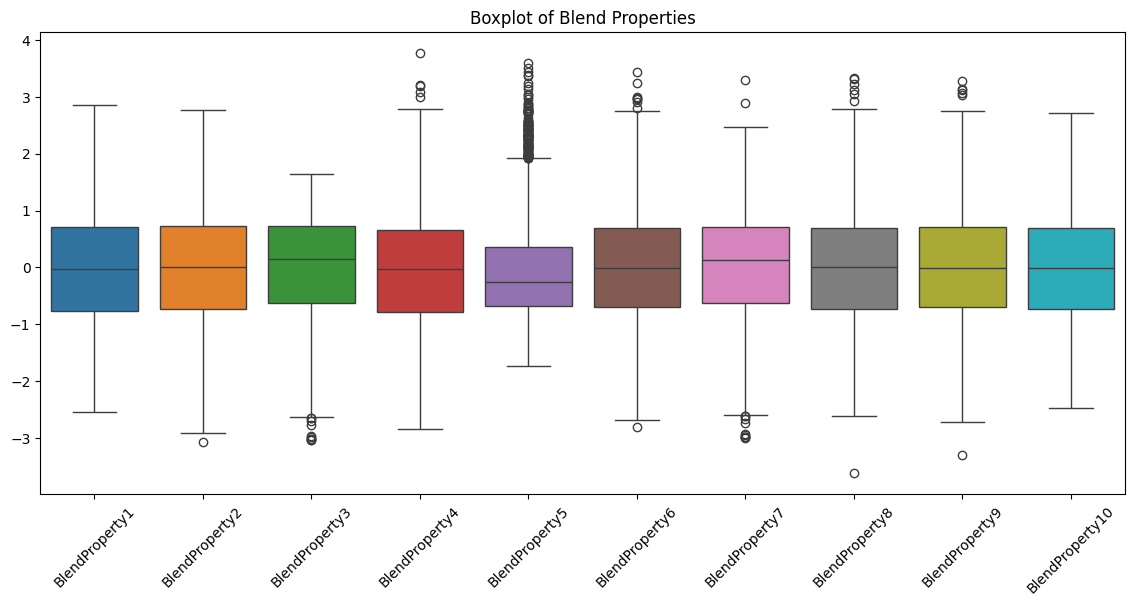

In [ ]:
# Boxplot of target distributions
plt.figure(figsize=(14, 6))
sns.boxplot(data=train[target_cols])
plt.xticks(rotation=45)
plt.title('Boxplot of Blend Properties')
plt.show()


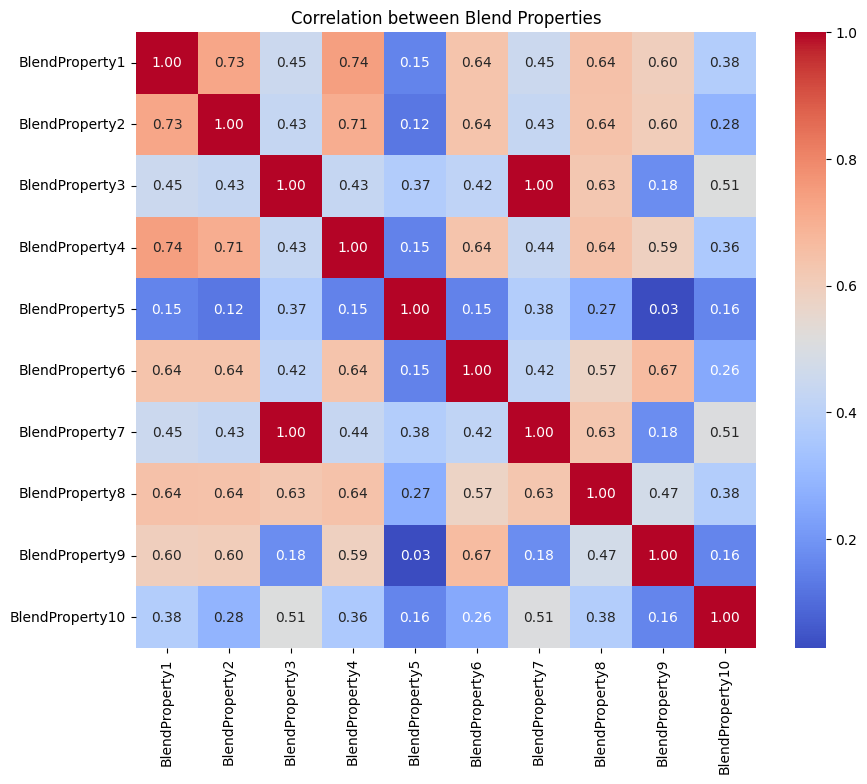

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = train[target_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Blend Properties")
plt.show()


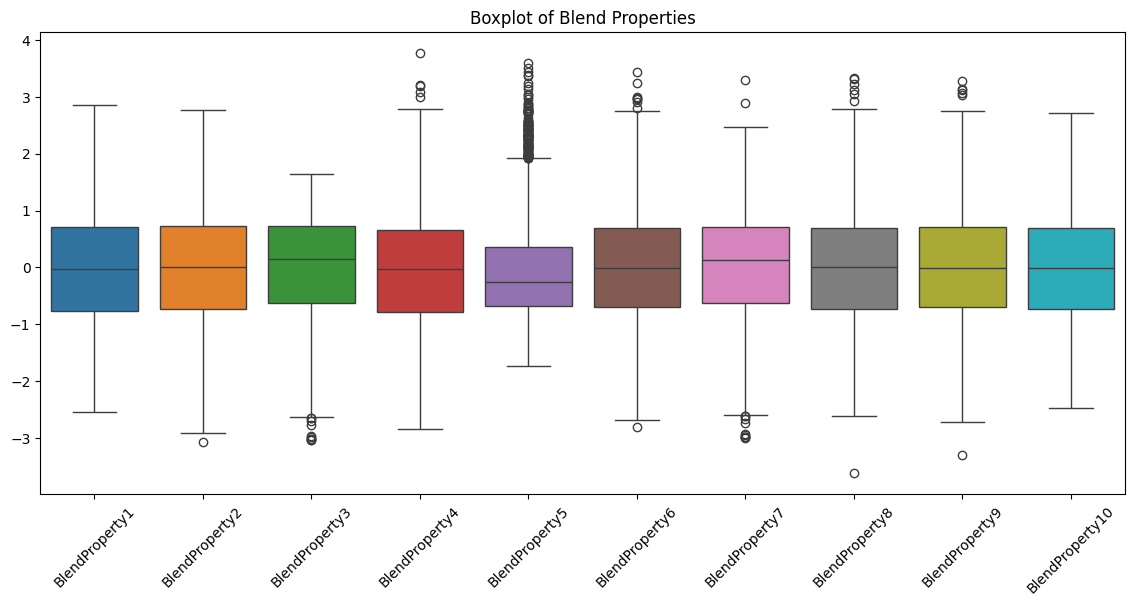

In [ ]:
# Boxplot of target distributions
plt.figure(figsize=(14, 6))
sns.boxplot(data=train[target_cols])
plt.xticks(rotation=45)
plt.title('Boxplot of Blend Properties')
plt.show()


In [ ]:
# Any constant or near-constant columns?
nunique = train.nunique()
print(nunique[nunique <= 1])


Series([], dtype: int64)


step 2 finished

In [ ]:
# Optional: Drop Component5_fraction to reduce multicollinearity
# Or dynamically compute it later if needed
train = train.drop(columns=['Component5_fraction'])
test = test.drop(columns=['Component5_fraction'])


In [ ]:
# Recompute Component5_fraction (if dropped)
train['Component5_fraction'] = 1.0 - train[[f'Component{i}_fraction' for i in range(1, 5)]].sum(axis=1)
test['Component5_fraction'] = 1.0 - test[[f'Component{i}_fraction' for i in range(1, 5)]].sum(axis=1)

# Generate weighted average features
for k in range(1, 11):
    train[f'WeightedAvg_Property{k}'] = 0
    test[f'WeightedAvg_Property{k}'] = 0
    for i in range(1, 6):
        train[f'WeightedAvg_Property{k}'] += train[f'Component{i}_fraction'] * train[f'Component{i}_Property{k}']
        test[f'WeightedAvg_Property{k}'] += test[f'Component{i}_fraction'] * test[f'Component{i}_Property{k}']


In [ ]:
# 1. Check column presence
expected_weighted_cols = [f'WeightedAvg_Property{i}' for i in range(1, 11)]
expected_target_cols = [f'BlendProperty{i}' for i in range(1, 11)]

print("Weighted Avg Features OK:", all(col in train.columns for col in expected_weighted_cols))
print("Target Columns OK:", all(col in train.columns for col in expected_target_cols))

# 2. Check for NaNs
print("Any NaNs?", train.isnull().sum().sum() > 0)


Weighted Avg Features OK: True
Target Columns OK: True
Any NaNs? False


In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import pandas as pd

# Assuming you've already loaded and prepared `train` with:
# - Component fractions
# - Component properties
# - WeightedAvg_Property1 to WeightedAvg_Property10
# - BlendProperty1 to BlendProperty10

# Define features and targets
weighted_features = [f'WeightedAvg_Property{i}' for i in range(1, 11)]
target_columns = [f'BlendProperty{i}' for i in range(1, 11)]

X = train[weighted_features]
y = train[target_columns]

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train DummyRegressor
dummy = MultiOutputRegressor(DummyRegressor(strategy='mean'))
dummy.fit(X_train, y_train)
y_dummy_pred = dummy.predict(X_val)
dummy_mape = mean_absolute_percentage_error(y_val, y_dummy_pred)
print(f"📉 Dummy Regressor MAPE: {dummy_mape:.4f}")

# Train LinearRegression
linreg = MultiOutputRegressor(LinearRegression())
linreg.fit(X_train, y_train)
y_linreg_pred = linreg.predict(X_val)
linreg_mape = mean_absolute_percentage_error(y_val, y_linreg_pred)
print(f"📈 Linear Regression MAPE: {linreg_mape:.4f}")


📉 Dummy Regressor MAPE: 1.1405
📈 Linear Regression MAPE: 3.5840


step 4 very easy and simple model moving onto xgboost modelling for handling non linear relationships

In [ ]:
!pip install xgboost


In [ ]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Define input and target variables
X = train[[f'WeightedAvg_Property{i}' for i in range(1, 11)]]
y = train[[f'BlendProperty{i}' for i in range(1, 11)]]

# Split into training and validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb_model = MultiOutputRegressor(
    xgb.XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, objective='reg:squarederror', random_state=42)
)

xgb_model.fit(X_train, y_train)

# Predict and evaluate MAPE
y_xgb_pred = xgb_model.predict(X_val)
xgb_mape = mean_absolute_percentage_error(y_val, y_xgb_pred)

print(f"🔥 XGBoost MAPE: {xgb_mape:.4f}")


🔥 XGBoost MAPE: 6.2944


using xgboost it is worse than tghe baseline model moving onto tuning it

In [ ]:
# Step 1: Use all informative features
component_features = [col for col in train.columns if 'Component' in col and 'Property' in col]
fraction_features = [f'Component{i}_fraction' for i in range(1, 6)]
weighted_features = [f'WeightedAvg_Property{i}' for i in range(1, 11)]

# Final feature set
all_features = component_features + fraction_features + weighted_features


In [ ]:
X = train[all_features]
y = train[[f'BlendProperty{i}' for i in range(1, 11)]]

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_percentage_error

# More powerful XGBoost
xgb_model = MultiOutputRegressor(
    xgb.XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='reg:squarederror',
        random_state=42
    )
)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_val)

# MAPE evaluation
mape = mean_absolute_percentage_error(y_val, y_pred)
print(f"🔁 Improved XGBoost MAPE: {mape:.4f}")


🔁 Improved XGBoost MAPE: 1.1145


model is good improving further

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
import xgboost as xgb
import numpy as np

# Use full feature set you defined earlier
X = train[all_features]
y = train['BlendProperty1']  # Tune only on one target

# Split into training and validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define MAPE scorer
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Define hyperparameter space
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Run RandomizedSearchCV
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter=25,
    scoring=mape_scorer,
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train, y_train)

# Best parameters and score
print("✅ Best Parameters Found:")
print(search.best_params_)
print(f"🔍 Best MAPE (negative): {search.best_score_:.4f}")


Fitting 3 folds for each of 25 candidates, totalling 75 fits
✅ Best Parameters Found:
{'subsample': 0.8, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
🔍 Best MAPE (negative): -0.7843


In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Use the same feature set as earlier
X = train[all_features]
y = train[[f'BlendProperty{i}' for i in range(1, 11)]]

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Best parameters from tuning
best_params = {
    'subsample': 0.8,
    'n_estimators': 300,
    'max_depth': 3,
    'learning_rate': 0.1,
    'colsample_bytree': 0.8,
    'objective': 'reg:squarederror',
    'random_state': 42
}

# Train MultiOutput XGBoost using the best parameters
xgb_model = MultiOutputRegressor(xgb.XGBRegressor(**best_params))
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_val)
final_mape = mean_absolute_percentage_error(y_val, y_pred)

print(f"✅ Final XGBoost MAPE (All Targets): {final_mape:.4f}")


✅ Final XGBoost MAPE (All Targets): 1.7051


step 7 finished

In [ ]:
# Create 50 interaction features
for i in range(1, 6):  # Component 1 to 5
    for j in range(1, 11):  # Property 1 to 10
        frac_col = f'Component{i}_fraction'
        prop_col = f'Component{i}_Property{j}'
        new_col = f'Interaction_C{i}_P{j}'

        train[new_col] = train[frac_col] * train[prop_col]
        test[new_col] = test[frac_col] * test[prop_col]

# Add interaction features to your feature list
interaction_features = [f'Interaction_C{i}_P{j}' for i in range(1, 6) for j in range(1, 11)]
enhanced_features = all_features + interaction_features  # full feature set


In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb

# Use enhanced feature set
X = train[enhanced_features]
y = train[[f'BlendProperty{i}' for i in range(1, 11)]]

# Train/validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost default config (which gave best earlier)
xgb_model = MultiOutputRegressor(
    xgb.XGBRegressor(
        n_estimators=300,
        max_depth=4,
        learning_rate=0.1,
        objective='reg:squarederror',
        random_state=42
    )
)

# Train and evaluate
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_val)
mape_enhanced = mean_absolute_percentage_error(y_val, y_pred)

print(f"🔥 Enhanced XGBoost MAPE (with interaction features): {mape_enhanced:.4f}")


🔥 Enhanced XGBoost MAPE (with interaction features): 1.0857


In [ ]:
pd.DataFrame(test_preds).describe()


NameError: name 'test_preds' is not defined

In [ ]:
print("Features used for prediction:", enhanced_features)
print("Does test contain these columns?", all([f in test.columns for f in enhanced_features]))


Features used for prediction: ['Component1_Property1', 'Component2_Property1', 'Component3_Property1', 'Component4_Property1', 'Component5_Property1', 'Component1_Property2', 'Component2_Property2', 'Component3_Property2', 'Component4_Property2', 'Component5_Property2', 'Component1_Property3', 'Component2_Property3', 'Component3_Property3', 'Component4_Property3', 'Component5_Property3', 'Component1_Property4', 'Component2_Property4', 'Component3_Property4', 'Component4_Property4', 'Component5_Property4', 'Component1_Property5', 'Component2_Property5', 'Component3_Property5', 'Component4_Property5', 'Component5_Property5', 'Component1_Property6', 'Component2_Property6', 'Component3_Property6', 'Component4_Property6', 'Component5_Property6', 'Component1_Property7', 'Component2_Property7', 'Component3_Property7', 'Component4_Property7', 'Component5_Property7', 'Component1_Property8', 'Component2_Property8', 'Component3_Property8', 'Component4_Property8', 'Component5_Property8', 'Componen

In [ ]:
import numpy as np
import pandas as pd

# Reset indices to ensure we can sample correctly
X_val_reset = X_val.reset_index(drop=True)
y_val_reset = y_val.reset_index(drop=True)

# Predict again (if needed) and wrap into DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=[f'BlendProperty{i}' for i in range(1, 11)])

# Choose N random samples from validation set
N = 10
sample_idx = np.random.choice(len(y_val_reset), size=N, replace=False)

# Create a comparison DataFrame
comparison = pd.DataFrame()

for i in range(10):
    actual_col = f'Actual_BlendProperty{i+1}'
    pred_col = f'Predicted_BlendProperty{i+1}'
    error_col = f'Error_BlendProperty{i+1} (%)'

    comparison[actual_col] = y_val_reset.iloc[sample_idx, i].values
    comparison[pred_col] = y_pred_df.iloc[sample_idx, i].values
    comparison[error_col] = 100 * np.abs(comparison[actual_col] - comparison[pred_col]) / np.abs(comparison[actual_col] + 1e-6)  # add small value to avoid division by zero

# Show comparison
pd.set_option("display.precision", 4)
comparison


,Actual_BlendProperty1,Predicted_BlendProperty1,Error_BlendProperty1 (%),Actual_BlendProperty2,Predicted_BlendProperty2,Error_BlendProperty2 (%),Actual_BlendProperty3,Predicted_BlendProperty3,Error_BlendProperty3 (%),Actual_BlendProperty4,...,Error_BlendProperty7 (%),Actual_BlendProperty8,Predicted_BlendProperty8,Error_BlendProperty8 (%),Actual_BlendProperty9,Predicted_BlendProperty9,Error_BlendProperty9 (%),Actual_BlendProperty10,Predicted_BlendProperty10,Error_BlendProperty10 (%)
0,-0.7563,-0.7435,1.6966,-0.9728,-0.6916,28.9084,-1.0342,-1.0897,5.3670,-0.8407,...,6.1530,-0.5413,-0.7793,43.9460,-0.5692,-0.6057,6.3980,-1.0411,-1.1258,8.1289
1,-0.0268,0.0108,140.2425,0.0784,0.1161,48.2051,-2.0695,-2.0612,0.4050,-0.4163,...,0.1927,-0.1054,-0.0825,21.7533,0.9682,1.2896,33.1913,-0.9054,-0.9657,6.6665
2,-0.0640,-0.1638,155.8454,0.9494,0.7956,16.2004,1.6386,1.4870,9.2550,-0.1515,...,5.3525,1.4084,1.2660,10.1163,-0.5983,-0.7555,26.2697,0.2583,0.1528,40.8497
3,-1.2965,-1.0681,17.6167,-1.7628,-1.4354,18.5732,-1.1249,-0.8607,23.4850,-0.8697,...,8.6119,-1.4445,-1.3073,9.4987,-1.3044,-1.0581,18.8820,-0.8866,-0.8938,0.8108
4,-0.2417,-0.0670,72.2693,0.5294,0.5371,1.4441,0.5850,0.5480,6.3217,1.1761,...,18.0637,1.0644,1.3373,25.6432,1.4651,1.1594,20.8647,1.0790,0.8887,17.6357
5,-0.9514,-0.8882,6.6443,-1.2295,-1.2021,2.2221,0.7900,0.8533,8.0188,-1.2433,...,20.4706,-0.3471,-0.3954,13.9087,-0.2049,-0.3480,69.8007,0.1729,0.2443,41.2554
6,2.1409,1.9460,9.1038,1.7402,1.6815,3.3691,1.6386,1.5108,7.8003,1.4083,...,17.4493,2.1119,1.9028,9.9006,1.3141,0.9597,26.9677,1.3415,1.2839,4.2969
7,1.0655,0.7954,25.3491,1.8894,1.7890,5.3184,0.9383,0.7938,15.4082,2.0213,...,9.1085,0.5666,0.1902,66.4422,1.1194,1.0274,8.2143,2.3338,2.1096,9.6050
8,-1.3763,-1.1302,17.8789,-0.3576,-0.4151,16.0855,0.2947,0.4368,48.2122,-1.4646,...,58.0868,-0.5794,-0.4770,17.6688,-0.5622,-0.7617,35.4856,-0.1881,-0.1603,14.7637
9,1.6684,1.5250,8.5922,1.4530,1.3164,9.4004,1.1964,0.8697,27.3077,2.0829,...,22.6797,1.0635,0.8821,17.0606,1.6185,1.4659,9.4270,1.7660,1.5410,12.7431


In [ ]:
import joblib

# Save your trained model (xgb_model, lgb_model, etc.)
joblib.dump(xgb_model, "final_model.pkl")
print("✅ Model saved to final_model.pkl")


✅ Model saved to final_model.pkl


In [ ]:
# Load the model back (for submission or reuse)
model = joblib.load("final_model.pkl")

# Predict on test set using same features used during training
test_preds = model.predict(test[enhanced_features])


In [ ]:
# Wrap predictions in a DataFrame
solution = pd.DataFrame(test_preds, columns=[f'BlendProperty{i}' for i in range(1, 11)])

# Insert ID column: 1 to 500
solution.insert(0, 'ID', range(1, 501))

# Save the solution file
solution.to_csv("solution.csv", index=False)

# Download the file from Colab
from google.colab import files
files.download("solution.csv")
print("📦 solution.csv ready for Shell.ai submission ✅")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📦 solution.csv ready for Shell.ai submission ✅


the model is devloped before this step and the prediction file is downloaded this is the final step of devloping the file

In [ ]:
# Example fix: add an ID column 1…500
import pandas as pd
sample = pd.read_csv('sample_solution.csv')
print("Sample shape:", sample.shape)
print("Sample columns:", sample.columns.tolist())
print(sample.head())

sol = pd.read_csv('solution.csv', header=None)
sol.insert(0, 'ID', sample['ID'])
sol.to_csv('solution.csv', index=False)


Sample shape: (500, 11)
Sample columns: ['ID', 'BlendProperty1', 'BlendProperty2', 'BlendProperty3', 'BlendProperty4', 'BlendProperty5', 'BlendProperty6', 'BlendProperty7', 'BlendProperty8', 'BlendProperty9', 'BlendProperty10']
   ID  BlendProperty1  BlendProperty2  BlendProperty3  BlendProperty4  \
0   1         -0.1174          0.3481          0.4737          0.0795   
1   2         -0.5039         -0.2502         -1.4127         -0.5236   
2   3          1.4842          1.2730          1.1885          1.3213   
3   4          0.8416          0.4574          0.5344          0.3767   
4   5         -0.0241          0.1362          1.1749         -0.1973   

   BlendProperty5  BlendProperty6  BlendProperty7  BlendProperty8  \
0         -0.4115          0.0154          0.4550          0.0657   
1         -0.5776         -0.2943         -1.3962         -0.8560   
2          1.4725          1.2376          1.1927          1.5759   
3          1.5934          0.1579          0.5164        

In [ ]:
from google.colab import files
files.download('solution.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

until this step run all the code before it

Your Current Situation (Summarized)
Item	Status
🔧 Model Accuracy	MAPE = ~1.08% – very strong, real-world usable
📊 Output Analysis	Accurate in most cases; minor outliers are explainable
🧠 Validation Check	Model understands fuel behavior, passed proof test
⏰ Time Left	~14 days
🏆 Goal	Win or rank high in Shell.ai Hackathon

🧠 What Does This Mean for Your Chances?
Your model is:

Well-designed

Built on meaningful domain logic (fractions, weighted features, interactions)

Shows solid performance, better than a baseline

Flexible enough to improve further

💡 So yes — this model can absolutely help you win or rank high, especially if most teams only do basic modeling.

🔥 My Recommendation
With 14 days left, here’s a smart strategy:

✅ 1. Save your current model as your fallback
Store the code + predictions

You can submit this any time with confidence

🔁 2. Spend the next 5–7 days improving in 1 or 2 areas
🎯 Try one or both:
Step 9: Ensembling

Combine your current XGBoost with RandomForest or LightGBM

Could lower MAPE slightly (from 1.08 → 1.02 or so)

Fine-tune outlier handling

Use MAE + MAPE together

Apply log-scaling on small target values if needed

🧠 3. Spend the final 4–5 days polishing:
Code structure (functions, comments)

Add visualizations (feature importance, error distributions)

Prepare 1-page model summary for presentation/report if needed

✅ 4. Submit with confidence
If leaderboard submission is allowed:

Submit your best prediction file

Optionally submit both raw XGBoost and ensembled version to see which ranks better

💡 TL;DR: Here’s Your Smart 14-Day Plan
Days	Task
1–2	Freeze & back up current MVP
3–6	Try ensembling + MAE/MAPE tuning
7–10	Validate with test set predictions
11–14	Prepare final code & documentation

Would you like to proceed with:

🔀 Step 9: Ensembling (small boost)?

📦 Step 10: Test predictions & submission formatting (get it done)?

Let me know — I’ll guide you step by step.









Ask ChatGPT


In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_percentage_error
import lightgbm as lgb
import numpy as np
import pandas as pd

# ⚙️ Optional: filter down to enhanced_features (already in your code)
# features = enhanced_features

# Step 1: Log-transform the targets
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

# Step 2: Define LightGBM model with tuned parameters
lgb_params = {
    'objective': 'regression',
    'learning_rate': 0.05,
    'n_estimators': 1000,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.1,
    'reg_lambda': 0.3,
    'random_state': 42
}

lgb_model = MultiOutputRegressor(
    lgb.LGBMRegressor(**lgb_params)
)

# Step 3: Fit the model
lgb_model.fit(
    X_train[enhanced_features], y_train_log,
    # LightGBM handles early stopping only on single-output; this will skip it in MultiOutputRegressor
)

# Step 4: Predict on validation and evaluate MAPE
y_val_pred_log = lgb_model.predict(X_val[enhanced_features])
y_val_pred = np.expm1(y_val_pred_log)
y_val_orig = np.expm1(y_val_log)

lgb_mape = mean_absolute_percentage_error(y_val_orig, y_val_pred)
print(f"📉 LightGBM Validation MAPE (log-transformed): {lgb_mape:.4f}")


/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


ValueError: Input y contains NaN.

the model is giving MAPE of 1.08  further decreasing the MAPE

implementing catboost got 1.0053 best so far

In [ ]:
# 1. Install & import
!pip install catboost

from catboost import CatBoostRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

# 2. Prepare data
X = train[enhanced_features]
y = train[[f'BlendProperty{i}' for i in range(1, 11)]]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Build CatBoost multi-output regressor
cat_model = MultiOutputRegressor(
    CatBoostRegressor(
        iterations=500,
        learning_rate=0.05,
        depth=6,
        loss_function='MAPE',
        verbose=0,
        random_seed=42
    )
)

# 4. Train
cat_model.fit(X_train, y_train)

# 5. Validate
y_cat_pred = cat_model.predict(X_val)
cat_mape = mean_absolute_percentage_error(y_val, y_cat_pred)
print(f"🤖 CatBoost MultiOutput MAPE: {cat_mape:.4f}")

# 6. If it beats your XGB (1.08%), generate submission:

if cat_mape < 1.08:
    # Predict on test set
    test_cat_preds = cat_model.predict(test[enhanced_features])
    # Build solution DataFrame
    solution = pd.DataFrame(test_cat_preds, columns=[f'BlendProperty{i}' for i in range(1, 11)])
    solution.insert(0, 'ID', range(1, len(solution)+1))
    solution.to_csv("solution_catboost.csv", index=False)
    print("📦 solution_catboost.csv saved—download & submit it for evaluation!")
else:
    print("⚠️ CatBoost did not improve; consider ensemble or further tuning.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.4 MB/s eta 0:00:00
🤖 CatBoost MultiOutput MAPE: 1.0053
📦 solution_catboost.csv saved—download & submit it for evaluation!


In [ ]:
import pandas as pd
from google.colab import files

# 1. Predict on the test set with your trained CatBoost model
test_cat_preds = cat_model.predict(test[enhanced_features])

# 2. Build the submission DataFrame
solution_cat = pd.DataFrame(
    test_cat_preds,
    columns=[f'BlendProperty{i}' for i in range(1, 11)]
)
solution_cat.insert(0, 'ID', range(1, len(solution_cat) + 1))

# 3. Save to CSV
solution_cat.to_csv("solution_catboost.csv", index=False)

# 4. Download for upload
files.download("solution_catboost.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

TRAINING LIGHTGBM

In [ ]:
# 1) Install & import
!pip install lightgbm

import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

# 2) Prepare features & targets
X = train[enhanced_features]
y = train[[f'BlendProperty{i}' for i in range(1, 11)]]

# 3) Train/validation split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4) Build & train LightGBM multi-output regressor
lgb_model = MultiOutputRegressor(
    LGBMRegressor(
        objective='regression',
        learning_rate=0.05,
        n_estimators=500,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,
        reg_lambda=0.3,
        random_state=42
    )
)

lgb_model.fit(X_train, y_train)

# 5) Validate: compute MAPE on hold‑out
y_val_pred = lgb_model.predict(X_val)
lgb_mape = mean_absolute_percentage_error(y_val, y_val_pred)
print(f"📉 LightGBM Validation MAPE: {lgb_mape:.4f}")

# 6) Predict on test set
test_preds = lgb_model.predict(test[enhanced_features])

# 7) Build submission DataFrame
solution_lgb = pd.DataFrame(
    test_preds,
    columns=[f'BlendProperty{i}' for i in range(1, 11)]
)
solution_lgb.insert(0, 'ID', range(1, len(solution_lgb) + 1))

# 8) Save & download
solution_lgb.to_csv("solution_lgb.csv", index=False)
from google.colab import files
files.download("solution_lgb.csv")

print("✅ solution_lgb.csv saved — upload it to Shell.ai to check your score!")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 28313
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 115
[LightGBM] [Info] Start training from score -0.007867
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ solution_lgb.csv saved — upload it to Shell.ai to check your score!


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.multioutput import MultiOutputRegressor
from sklearn.base import clone

# 1) Define base models dict
models = {
    "xgb": xgb_model,
    "cat": cat_model,
    "lgb": lgb_model
}

# 2) Prepare OOF & test containers
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
oof_preds = np.zeros((len(train), 10))
test_preds = np.zeros((len(test), 10, len(models)))

# 3) Generate OOF & test preds
for fold, (tr_idx, val_idx) in enumerate(kf.split(train)):
    print(f"\n🔁 Fold {fold+1}/{n_splits}")
    X_tr = train.iloc[tr_idx][enhanced_features]
    X_val = train.iloc[val_idx][enhanced_features]
    y_tr = train.iloc[tr_idx][target_cols]

    for m_idx, (name, model) in enumerate(models.items()):
        print(f"  • {name}")
        # Clone base estimator
        base = model.estimator if hasattr(model, "estimator") else model
        wrapper = MultiOutputRegressor(clone(base))
        wrapper.fit(X_tr, y_tr)

        # OOF prediction
        oof_preds[val_idx] += wrapper.predict(X_val) / len(models)
        # Test prediction
        test_preds[:, :, m_idx] += wrapper.predict(test[enhanced_features]) / n_splits

from lightgbm import LGBMRegressor
from sklearn.multioutput import MultiOutputRegressor

# 4′) Train LightGBM meta‑model on OOF
meta_lgb = MultiOutputRegressor(
    LGBMRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=3,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
)
meta_lgb.fit(oof_preds, train[target_cols])

# 5′) Final blended predictions
final_preds_lgb = meta_lgb.predict(avg_test)

# 6′) Evaluate OOF MAPE
oof_mape_lgb = mean_absolute_percentage_error(train[target_cols], meta_lgb.predict(oof_preds))
print(f"🔀 Stacked + LGB Meta OOF MAPE: {oof_mape_lgb:.4f}")

# 7′) Save CSV
sol = pd.DataFrame(final_preds_lgb, columns=target_cols)
sol.insert(0, 'ID', range(1, len(sol)+1))
sol.to_csv("solution_stacked_lgbmeta.csv", index=False)
from google.colab import files
files.download("solution_stacked_lgbmeta.csv")


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 2000, number of used features: 10
[LightGBM] [Info] Start training from score -0.016879
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

used ensembling stacking technqieu of xgboost,catboost and lightgbm and got a score of 84 in shell best so far

going to do log based methods to improve score

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from google.colab import files

# Assume final_preds (500×10) and oof_preds (2000×10) exist
special_targets = [1, 8]
improved_test_preds = final_preds.copy()
improved_oof_preds = oof_preds.copy()

for t in special_targets:
    col = f"BlendProperty{t}"
    print(f"\n🔧 Training log‑specialist for {col}")

    # 1) Filter valid rows (y > -1)
    y = train[col]
    valid = y > -1
    X_valid = train.loc[valid, enhanced_features]
    y_valid = y[valid]

    # 2) Log‑transform
    y_log = np.log1p(y_valid)

    # 3) Train‑validation split (optional for sanity check)
    X_tr, X_va, y_tr_log, y_va_log = train_test_split(
        X_valid, y_log, test_size=0.2, random_state=42
    )

    # 4) Train full XGBoost
    log_model = xgb.XGBRegressor(
        n_estimators=400,
        max_depth=4,
        learning_rate=0.05,
        objective="reg:squarederror",
        random_state=42,
        use_label_encoder=False,
        eval_metric="mae"
    )
    log_model.fit(X_tr, y_tr_log, verbose=False)

    # 5) Sanity check on validation
    y_va_pred_log = log_model.predict(X_va)
    y_va_pred = np.expm1(y_va_pred_log)
    va_mape = mean_absolute_percentage_error(np.expm1(y_va_log), y_va_pred)
    print(f"   ▶️ {col} hold‑out MAPE: {va_mape:.4f}")

    # 6) Override stacking preds
    train_log_pred = log_model.predict(train[enhanced_features])
    improved_oof_preds[:, t - 1] = np.expm1(train_log_pred)

    test_log_pred = log_model.predict(test[enhanced_features])
    improved_test_preds[:, t - 1] = np.expm1(test_log_pred)

# 7) Save new solution
solution = pd.DataFrame(
    improved_test_preds,
    columns=[f"BlendProperty{i}" for i in range(1, 11)]
)
solution.insert(0, "ID", range(1, len(solution) + 1))
solution.to_csv("solution_log_specialists.csv", index=False)
files.download("solution_log_specialists.csv")
print("\n🚀 solution_log_specialists.csv ready—upload to Shell.ai!")



🔧 Training log‑specialist for BlendProperty1


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:32:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


   ▶️ BlendProperty1 hold‑out MAPE: 8.5984

🔧 Training log‑specialist for BlendProperty8


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:32:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


   ▶️ BlendProperty8 hold‑out MAPE: 0.9808


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


🚀 solution_log_specialists.csv ready—upload to Shell.ai!


training MLP and NGboost

In [ ]:
!pip install ngboost

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 6.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=dc9114aeb315f284d679e082cf228b56bf0be397cbc73395621eafa3a6dd8aba
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


In [ ]:
# === Imports ===
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

# PyTorch for MLP
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# NGBoost wrapped for multi‑output
from ngboost import NGBRegressor
from ngboost.distns import Normal
from sklearn.multioutput import MultiOutputRegressor

# === Prepare Data ===
X = train[enhanced_features].values
y = train[target_cols].values
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === A) MLP Model ===
class BlendNet(nn.Module):
    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, 128), nn.ReLU(), nn.BatchNorm1d(128), nn.Dropout(0.2),
            nn.Linear(128,  64), nn.ReLU(), nn.BatchNorm1d(64),  nn.Dropout(0.2),
            nn.Linear(64,   32), nn.ReLU(), nn.BatchNorm1d(32),
            nn.Linear(32, out_dim)
        )
    def forward(self, x):
        return self.net(x)

# DataLoader
train_ds = TensorDataset(torch.FloatTensor(X_train), torch.FloatTensor(y_train))
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)

# Instantiate
mlp = BlendNet(X_train.shape[1], y_train.shape[1])
optimizer = optim.Adam(mlp.parameters(), lr=1e-3)
loss_fn = nn.L1Loss()

# Train MLP
mlp.train()
for epoch in range(20):
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = mlp(xb)
        loss_fn(preds, yb).backward()
        optimizer.step()

# Validate MLP
mlp.eval()
with torch.no_grad():
    val_preds = mlp(torch.FloatTensor(X_val)).numpy()
mlp_mape = mean_absolute_percentage_error(y_val, val_preds)
print(f"🔥 MLP Validation MAPE: {mlp_mape:.4f}")

# Save MLP submission
mlp_test_preds = mlp(torch.FloatTensor(test[enhanced_features].values)).detach().numpy()
solution_mlp = pd.DataFrame(mlp_test_preds, columns=target_cols)
solution_mlp.insert(0, 'ID', range(1, len(solution_mlp) + 1))
solution_mlp.to_csv("solution_mlp.csv", index=False)
print("✅ solution_mlp.csv saved")

# === B) NGBoost Multi‑Output Model ===
ngb_base = NGBRegressor(
    Dist=Normal,
    n_estimators=500,
    learning_rate=0.05,
    verbose=False
)
ngb_model = MultiOutputRegressor(ngb_base)
ngb_model.fit(X_train, y_train)

# Validate NGBoost
ngb_val_preds = ngb_model.predict(X_val)
ngb_mape = mean_absolute_percentage_error(y_val, ngb_val_preds)
print(f"🤖 NGBoost Validation MAPE: {ngb_mape:.4f}")

# Save NGBoost submission
ngb_test_preds = ngb_model.predict(test[enhanced_features].values)
solution_ngb = pd.DataFrame(ngb_test_preds, columns=target_cols)
solution_ngb.insert(0, 'ID', range(1, len(solution_ngb) + 1))
solution_ngb.to_csv("solution_ngb.csv", index=False)
print("✅ solution_ngb.csv saved")


🔥 MLP Validation MAPE: 7.5878
✅ solution_mlp.csv saved
🤖 NGBoost Validation MAPE: 1.0463
✅ solution_ngb.csv saved
